# Exploratory Data Analysis

##### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json



Import the modified dataframe from the data cleaning notebook


In [3]:
RUTA_DATAFRAME = '../data/interim/df_final.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [4]:
df.head(5)

,CCAA,SEXOa,EDADa,E1_1,E1C,E1E,E2_1a,E2_1b,E2_1c,E2_1d,...,W129,X130,X131,X132,Y133,CLASE_PR,IMC,SEVERIDAD_DEPRESIVA,CUADROS_DEPRESIVOS,dep_anx
0,16.0,1.0,60.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,2.0,0,5.0,2.0,1.0,3.0,0
1,16.0,2.0,87.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,3.0,1.0,2.0,0,1.0,9.0,3.0,3.0,0
2,16.0,1.0,38.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,4.0,0,4.0,3.0,3.0,2.0,0
3,16.0,2.0,43.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,8.0,2.0,1.0,2.0,1,1.0,2.0,1.0,3.0,0
4,16.0,1.0,41.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,NaN,4.0,1.0,5.0,0,4.0,3.0,1.0,3.0,0


The modified dataframe contains rows: 22072, columns : 348

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 348 entries, CCAA to dep_anx
dtypes: float64(136), int64(212)
memory usage: 58.6 MB


Creating a copy of the imported dataframe to preserve it as more modifications will be conducted:

In [6]:
clean_df = df.copy()

## Loading Json dictionary file


On the notebook json_maker.ipynb we created a json dictionary file 'full_var_dict.json' containing the original variable name, a descriptive variable name, as well as a brief description of each of the variable values. The goal of this file is to ease the EDA and to produce graphs easier to read and understand with informative titles and descriptions of the categories of each variable.

In [7]:
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)

Example of how the JSON file looks: this is the dictionary of the variable CCAA

In [8]:
varijson['CCAA']

{'diccionario': {'01': 'Andalucía',
  '02': 'Aragón',
  '03': 'Asturias, Principado de',
  '04': 'Balears, Illes',
  '05': 'Canarias',
  '06': 'Cantabria',
  '07': 'Castilla y León',
  '08': 'Castilla - La Mancha',
  '09': 'Cataluña',
  '10': 'Comunitat Valenciana',
  '11': 'Extremadura',
  '12': 'Galicia',
  '13': 'Madrid, Comunidad de',
  '14': 'Murcia, Región de',
  '15': 'Navarra, Comunidad Foral de',
  '16': 'País Vasco',
  '17': 'Rioja, La',
  '18': 'Ceuta',
  '19': 'Melilla'},
 'Descripción': 'Comunidad Autónoma de residencia'}

This function will be applied to the EDA graphs. It parses the JSON file to recover a descriptive variable name (e.g., title), the category values of a variable (e.g., values), and the actual category names inside a variable (e.g., categories)

In [9]:

def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

## Univariate analysis

## Demographic information

*   More than 50% of the sample are women
*   Over 80% of participants have Spanish nationality
*   Roughly 27% of participants are single and about 50% are married
*   About 70% mention that their health in the last 12 months has been very good or good

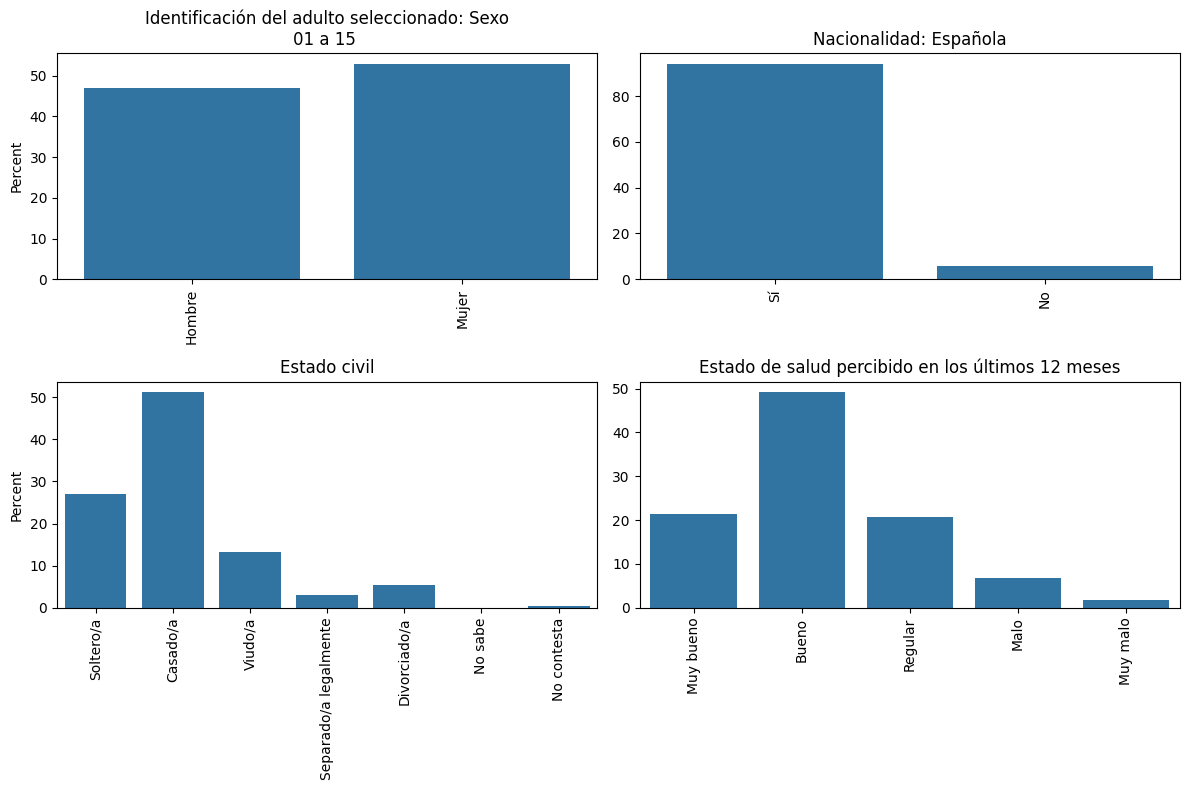

In [39]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90)  # adjust rotation and alignment if needed

  # ax.set_xticks(values)
  # ax.set_xticklabels(categories,  ha='center')  # adjust rotation and alignment if needed

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

In [11]:
def plot_single_numerical_variable(dataframe, column):

    fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]})

    # Calcula la media, mediana y desviación estándar de los datos
    media = np.mean(dataframe[column])
    mediana = np.median(dataframe[column])
    desviacion_estandar = np.std(dataframe[column])

    # Crear una figura múltiple con histogramas y diagramas de caja
    sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
    axis[0].axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {media:.2f}' )
    axis[0].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {mediana:.2f}')
    axis[0].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {desviacion_estandar:.2f}')
    axis[0].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    sns.boxplot(ax=axis[1], data=dataframe, x=column).set(xlabel=None)
    axis[1].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Mean')
    axis[1].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Median')
    axis[1].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1)
    axis[1].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    axis[0].legend()

    fig.suptitle(column)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()

# Uso del código
# Supongamos que 'data' es tu DataFrame y 'variable' es la columna que deseas graficar
# plot_single_numerical_variable(data, 'variable')


Participants are on average 55 years old and most of them are between 35 and 75 years old, approximately

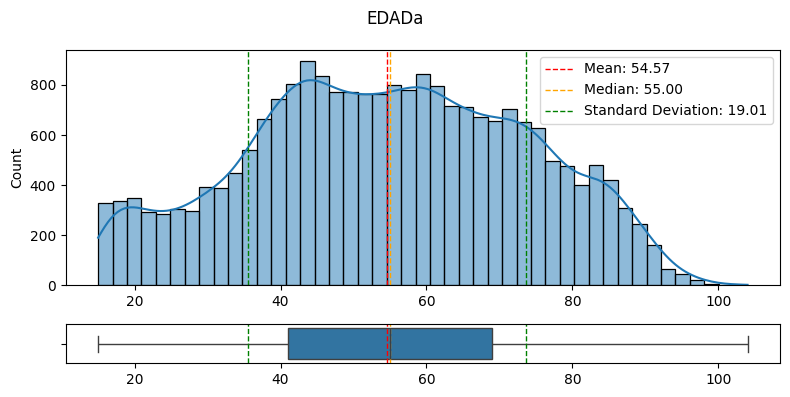

In [12]:
plot_single_numerical_variable(clean_df, 'EDADa')

Most participants live in the communities of Andalucia, Catalonia and Madrid

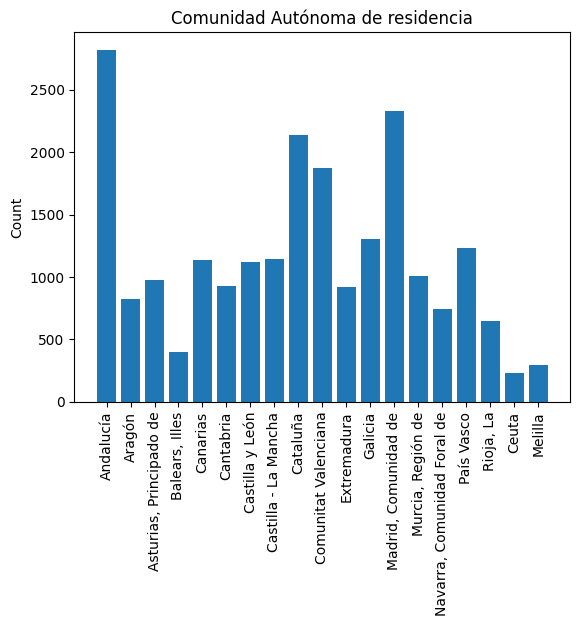

In [13]:
var_x = 'CCAA'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Life habits

**Comsumption of fast food and fruits:**
* More than 60% of participants report eating fast food less than once a week or never
* About 70% of participants report eating fruit one or more times per day

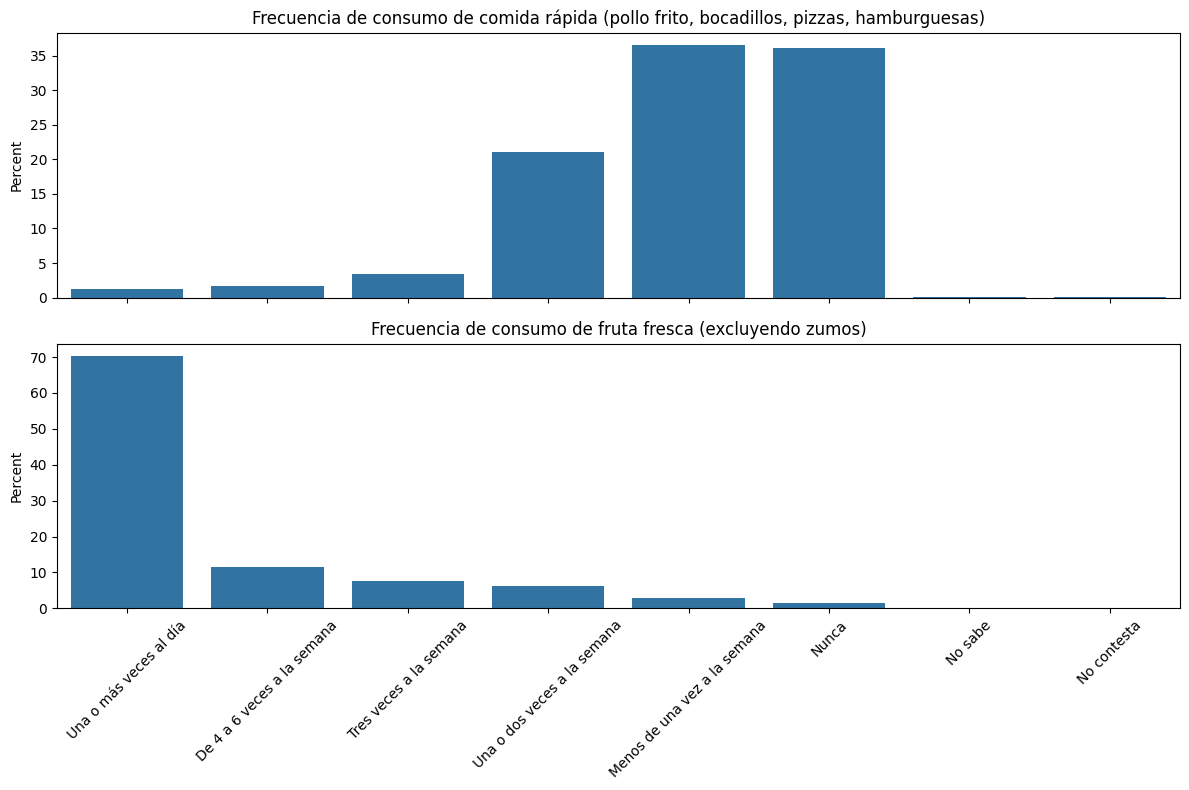

In [14]:
vars=['U120_13', 'U120_1']
cols=1
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('Percent')
  ax.set_xlabel('')

axis[1].set_xticks(range(len(values)))
axis[1].set_xticklabels(categories,  rotation=45)  
axis[0].set_xticklabels('') 

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

**Smoking**
* The majority of participants report the have never smoked 

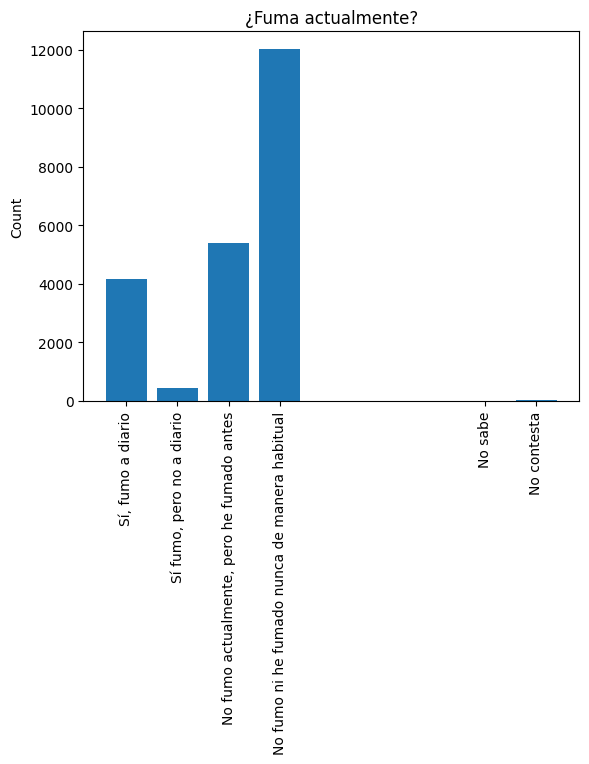

In [15]:
var_x = 'V121'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Depression/Anxiety-related variables

**Target variable: 'dep_anx'**

*  Approximately 10% of the partcipants report ever suffering from depression or anxiety

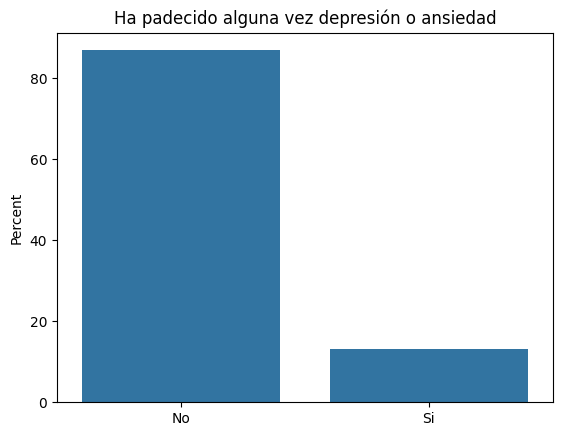

In [25]:
var_x = 'dep_anx'

# Crea el gráfico de barras
sns.countplot(data=clean_df, x='dep_anx', stat='percent')

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Ha padecido alguna vez depresión o ansiedad')

plt.xticks([0,1], ['No','Si'])

# Muestra el gráfico
plt.show()

*   Approximately 5% of participants report ever taken NOT prescribed antidepressants 
*   Approximately 5% of participants report ever taken prescribed antidepressants 
*   Approximately 10% of participants report ever taken NOT prescribed tranquilizers
*   Approximately 10% of participants report ever taken prescribed tranquilizers 

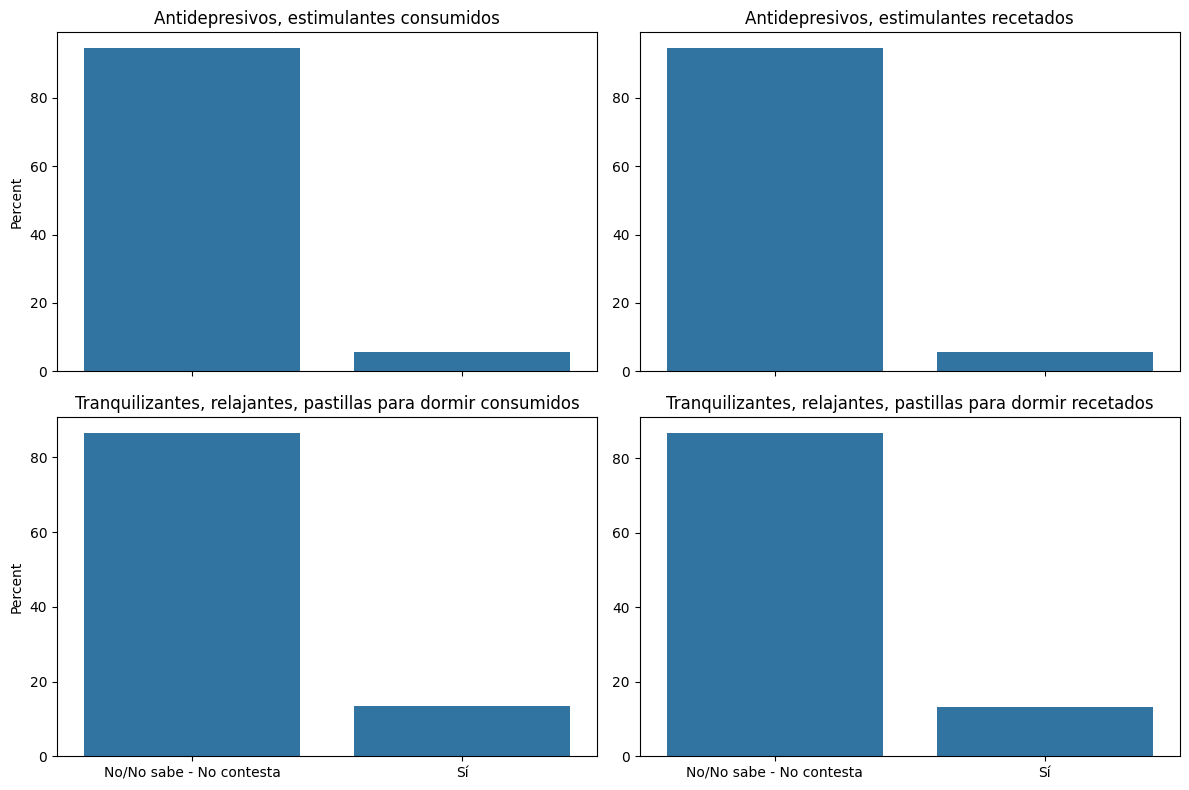

In [40]:
vars=['P87_14a', 'P87_14b', 'P87_7a', 'P87_7b']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))
for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(values)
  ax.set_xticklabels(categories)  

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')
axis[0,0].set_xticklabels('')  
axis[0,1].set_xticklabels('')  

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()